# V2 Notebook

# TODOs:

### Auto extract forms: https://www.thepythoncode.com/article/extracting-and-submitting-web-page-forms-in-python
### Autorecon
### Wfuzz

#

### Searchsploit
### Full auto cross tool URL collection and traversal
### 'IP Forwarded By' hiding

https://eightytwo.net/blog/brute-forcing-the-admin-password-on-nibbles/

In [1]:
from web_footprinting_utils import setup_ipython

get_ipython, INTERACTIVE = setup_ipython()

In [2]:
%env TARGET=10.10.144.120
%env PORT=80

env: TARGET=10.10.144.120
env: PORT=80


In [3]:
import os 

port = os.environ['PORT']
target_site = os.environ['TARGET']
!ping -c 5 $TARGET

PING 10.10.144.120 (10.10.144.120) 56(84) bytes of data.
64 bytes from 10.10.144.120: icmp_seq=1 ttl=64 time=3.52 ms
64 bytes from 10.10.144.120: icmp_seq=2 ttl=64 time=0.340 ms
64 bytes from 10.10.144.120: icmp_seq=3 ttl=64 time=0.344 ms
64 bytes from 10.10.144.120: icmp_seq=4 ttl=64 time=0.384 ms
64 bytes from 10.10.144.120: icmp_seq=5 ttl=64 time=0.444 ms

--- 10.10.144.120 ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4079ms
rtt min/avg/max/mdev = 0.340/1.007/3.524/1.258 ms


In [4]:
from web_footprinting_utils import WebsiteRecord, LinkRecorder

record = WebsiteRecord(target_site, directory="", port=port)

In [25]:
record = WebsiteRecord(target_site, directory="/r/a/b/b/i/t", port=port)
record.ffuf(wordlist='alice_words.txt')


        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.144.120:80/r/a/b/b/i/t/FUZZ
 :: Wordlist         : FUZZ: alice_words.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads          : 50
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

:: Progress: [85/85] :: Job [1/1] :: 0 req/sec :: Duration: [0:00:00] :: Errors: 0 ::


fingerprinting http://10.10.144.120:80


Whatweb:
http://10.10.144.120:80 [200 OK] Country[RESERVED][ZZ], HTML5, IP[10.10.144.120], Title[Follow the white rabbit.]


Ffuf:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.144.120:80/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads          : 50
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

[Status: 200, Size: 4

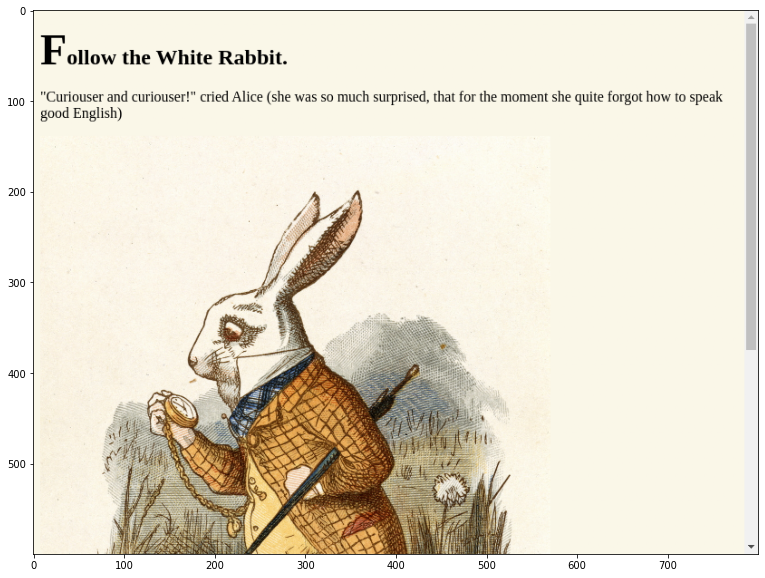

In [5]:
%matplotlib inline
results = record.fingerprint_page()

In [6]:
record.fingerprint_extended()



Ffuf Extensions:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.144.120:80/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Extensions       : .asp .aspx .bat .c .cfm .cgi .com .dll .exe .htm .html .inc .jhtml .jsa .jsp .log .mdb .nsf .php .phtml .pl .reg .sh .shtml .sql .txt .xml / 
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 5
 :: Threads          : 120
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

[Status: 

# Main Checks Complete!

In [7]:
input("Press any keys...")

Press any keys... 


''

fingerprinting http://10.10.144.120:80/r/a/b/b/i/t


Whatweb:
http://10.10.144.120:80/r/a/b/b/i/t [301 Moved Permanently] Country[RESERVED][ZZ], IP[10.10.144.120], RedirectLocation[t/]
http://10.10.144.120/r/a/b/b/i/t/ [200 OK] Country[RESERVED][ZZ], HTML5, IP[10.10.144.120], Title[Enter wonderland]


Ffuf:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.144.120:80/r/a/b/b/i/t/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads         

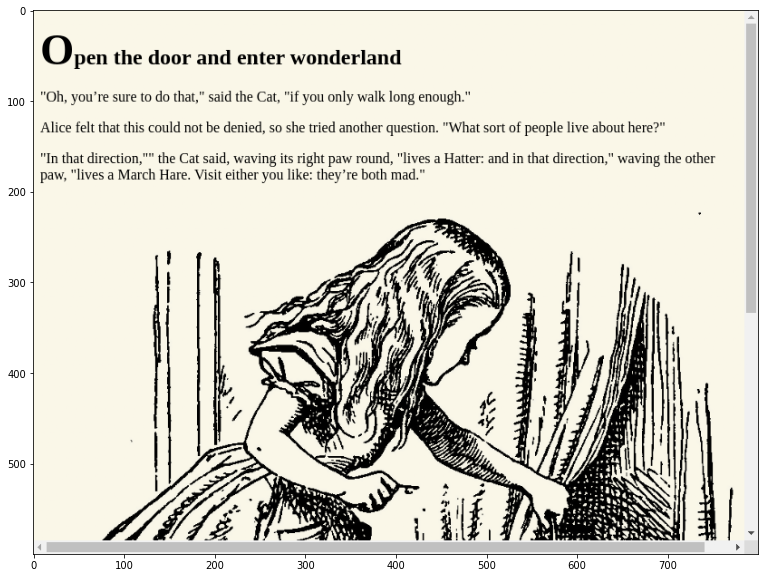

In [23]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/r/a/b/b/i/t", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

fingerprinting http://10.10.144.120:80/poem


Whatweb:
http://10.10.144.120:80/poem [301 Moved Permanently] Country[RESERVED][ZZ], IP[10.10.144.120], RedirectLocation[poem/]
http://10.10.144.120/poem/ [200 OK] Country[RESERVED][ZZ], HTML5, IP[10.10.144.120], Title[The Jabberwocky]


Ffuf:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.144.120:80/poem/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads          : 50
 :: Matcher         

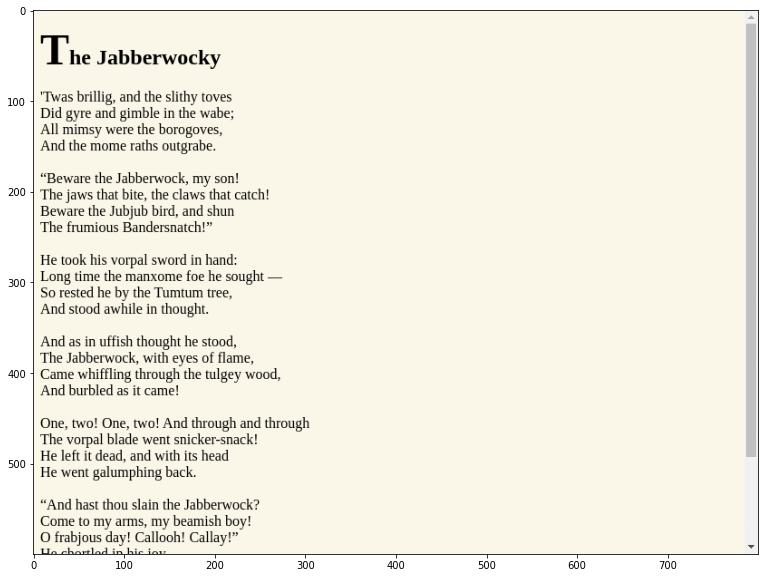

In [10]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/poem", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [20]:
record_alt = WebsiteRecord(target_site, directory="/poem/index.html", port=80)
!cd CeWL && unbuffer ./cewl.rb -c {target_site}"/poem"
!cd CeWL && unbuffer ./cewl.rb {target_site}"/poem"

CeWL 5.5.2 (Grouping) Robin Wood (robin@digi.ninja) (https://digi.ninja/)
the, 15
and, 7
And, 7
The, 6
Jabberwock, 3
through, 3
Jabberwocky, 2
Twas, 2
brillig, 2
slithy, 2
toves, 2
Did, 2
gyre, 2
gimble, 2
wabe, 2
All, 2
mimsy, 2
were, 2
borogoves, 2
mome, 2
raths, 2
outgrabe, 2
Beware, 2
that, 2
his, 2
vorpal, 2
stood, 2
thought, 2
with, 2
One, 2
two, 2
went, 2
son, 1
jaws, 1
bite, 1
claws, 1
catch, 1
Jubjub, 1
bird, 1
shun, 1
frumious, 1
Bandersnatch, 1
took, 1
sword, 1
hand, 1
Long, 1
time, 1
manxome, 1
foe, 1
sought, 1
rested, 1
Tumtum, 1
tree, 1
awhile, 1
uffish, 1
eyes, 1
flame, 1
Came, 1
whiffling, 1
tulgey, 1
wood, 1
burbled, 1
came, 1
blade, 1
snicker, 1
snack, 1
left, 1
dead, 1
its, 1
head, 1
galumphing, 1
back, 1
hast, 1
thou, 1
slain, 1
Come, 1
arms, 1
beamish, 1
boy, 1
frabjous, 1
day, 1
Callooh, 1
Callay, 1
chortled, 1
joy, 1
CeWL 5.5.2 (Grouping) Robin Wood (robin@digi.ninja) (https://digi.ninja/)
the
and
And
The
Jabberwock
through
Jabberwocky
Twas
brillig
slithy
toves
D

In [11]:
input("Press any keys...")

KeyboardInterrupt: Interrupted by user

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins/akismet", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
from web_footprinting_utils import save_notebook

save_notebook()

In [ ]:
if INTERACTIVE:
    !jupyter nbconvert --to script "3_Web_Footprinting_V2.ipynb"